In [95]:
from astroquery.sdss import SDSS
import astropy.units as u
from astropy.io import fits
import matplotlib.pyplot as plt
import math
import numpy as np
from specutils import Spectrum
from specutils.fitting import fit_generic_continuum
from specutils.manipulation import LinearInterpolatedResampler
from labellines import labelLines
import matplotlib.axes as axes
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import scipy

C:\Users\nihad\AppData\Local\Temp\ipykernel_30564\1652884142.py:18: RuntimeWarning: divide by zero encountered in divide
  uncert = 1/np.sqrt(ivar)


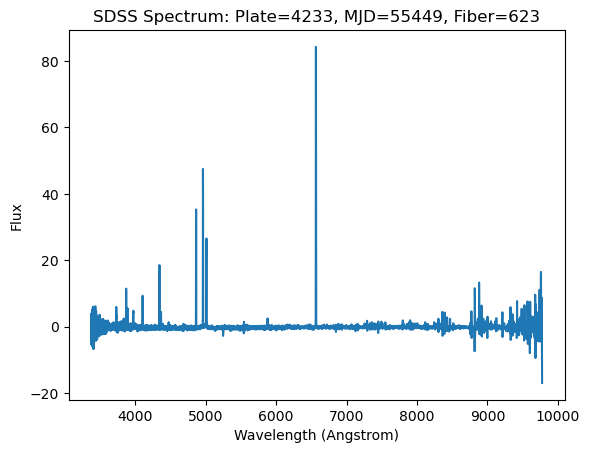

In [27]:
plate = 4233
mjd = 55449
fiber = 623

sp = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiber)

spec_hdu = sp[0]
spec_data = spec_hdu[1].data

z = spec_hdu[2].data["z"]

header = spec_hdu[0].header

loglam = spec_data['loglam'].copy()
flux = spec_data['flux'].copy()
wavelength = 10**loglam/(1+z)
ivar = spec_data['ivar'].copy()
uncert = 1/np.sqrt(ivar)

uerg = u.erg/(u.s*u.cm**2*u.AA)
spec1d = Spectrum(spectral_axis=wavelength/(1+z)*u.AA, flux=flux*uerg)
continuum=fit_generic_continuum(spec1d)
fit_cont = continuum(wavelength/(1+z)*u.AA)

flux = flux*uerg-fit_cont

plt.plot(wavelength, flux)
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.title(f"SDSS Spectrum: Plate={plate}, MJD={mjd}, Fiber={fiber}")
plt.show()

C:\Users\nihad\anaconda3\Lib\site-packages\labellines\core.py:181: UserWarning: Tried to label line Line2D(_child6), but could not find a label for it.
  warnings.warn(
C:\Users\nihad\anaconda3\Lib\site-packages\labellines\core.py:267: UserWarning: The value at position 2 in `xvals` is outside the range of its associated line (xmin=4960.294999999999, xmax=4960.294999999999, xval=4960.295). Clipping it into the allowed range.
  warnings.warn(
C:\Users\nihad\anaconda3\Lib\site-packages\labellines\core.py:267: UserWarning: The value at position 3 in `xvals` is outside the range of its associated line (xmin=4862.679999999999, xmax=4862.679999999999, xval=4862.68). Clipping it into the allowed range.
  warnings.warn(
C:\Users\nihad\anaconda3\Lib\site-packages\labellines\core.py:267: UserWarning: The value at position 4 in `xvals` is outside the range of its associated line (xmin=4102.889999999999, xmax=4102.889999999999, xval=4102.89). Clipping it into the allowed range.
  warnings.warn(


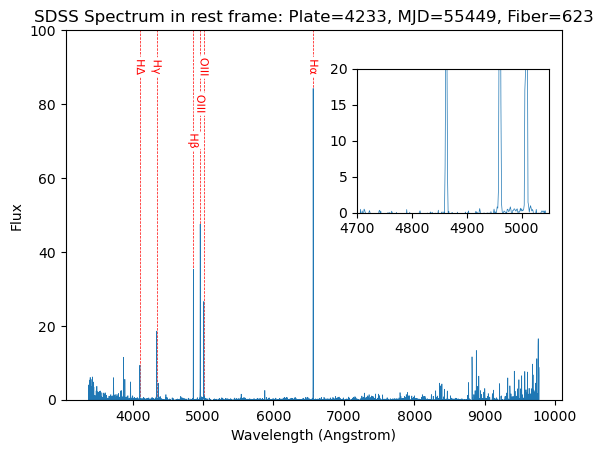

In [29]:
fig, ax = plt.subplots()

#common spectral lines in SDSS
xvals = [6564.61, 5008.240, 4960.295, 4862.68, 4102.89, 4341.68 ]
label = ['Hα', 'OIII', 'OIII', 'Hβ', 'HΔ', 'Hγ']

for i in range(len(xvals)):
     plt.axvline(xvals[i], color="red", linewidth=0.5, linestyle="--", label= label[i])

#plot the spectrum
ax.plot(wavelength, flux, linewidth=0.5)
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.ylim(0,100)
plt.title(f"SDSS Spectrum in rest frame: Plate={plate}, MJD={mjd}, Fiber={fiber}")

#vertical lines
offset = [40, 40, 30, 20, 40, 40]
lines = plt.gca().get_lines()
labelLines(lines, align=True, yoffsets=offset, xvals = xvals, fontsize = 8)

#inset plot
inset = fig.add_axes([0.58, 0.5, 0.3, 0.3])
inset.plot(wavelength, flux, linewidth=0.5)
inset.set_xlim(4700, 5050)
inset.set_ylim(0, 20)
plt.savefig("SDSS_model.png")

plt.show()

Text(0.5, 1.0, 'SDSS Spectrum in rest frame: Plate=4233, MJD=55449, Fiber=623')

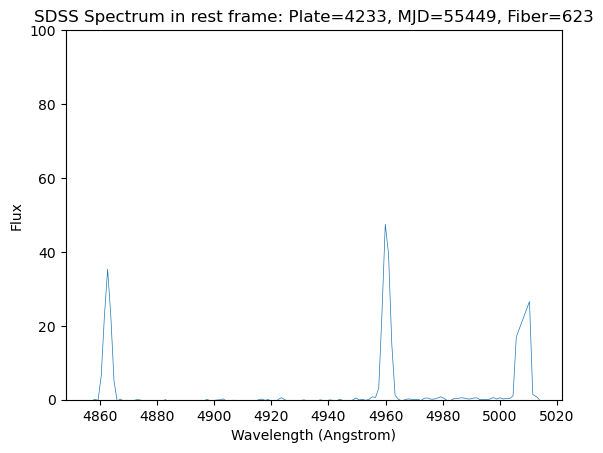

In [31]:
#Get indices in a range:
min1 = np.where(wavelength > 4855)[0][0]
max1 = np.where(wavelength > 5015)[0][0]

plt.plot(wavelength[min1:max1], flux[min1:max1], linewidth=0.5)
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.ylim(0,100)
plt.title(f"SDSS Spectrum in rest frame: Plate={plate}, MJD={mjd}, Fiber={fiber}")

Text(0.5, 1.0, 'SDSS Spectrum in rest frame: Plate=4233, MJD=55449, Fiber=623')

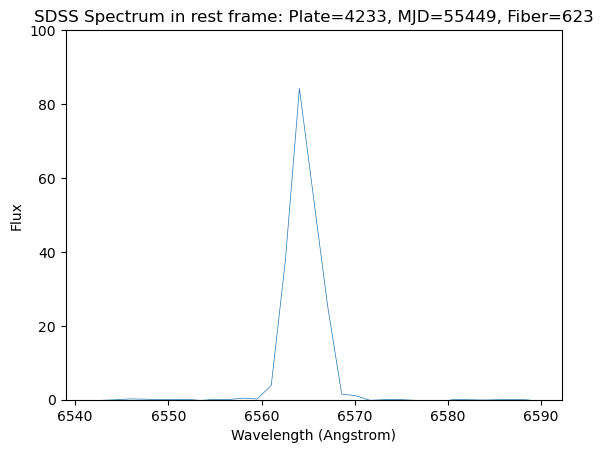

In [33]:
#Get indices in a range:
min2 = np.where(wavelength > 6540)[0][0]
max2 = np.where(wavelength > 6590)[0][0]

plt.plot(wavelength[min2:max2], flux[min2:max2], linewidth=0.5)
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.ylim(0,100)
plt.title(f"SDSS Spectrum in rest frame: Plate={plate}, MJD={mjd}, Fiber={fiber}")

In [35]:
ivar0 = np.where(ivar == 0)[0]
print(ivar0)
print(min1, max1, min2, max2)
clipped = [item for item in ivar0 if ((item > min1 and item < max1) or (item > min2 and item < max2))]
print(clipped)

[1716 1717 1718 1919 1920 1921 2893 3246 3255 3257 3258 3669 3889 3914]
1583 1723 2877 2910
[1716, 1717, 1718, 2893]


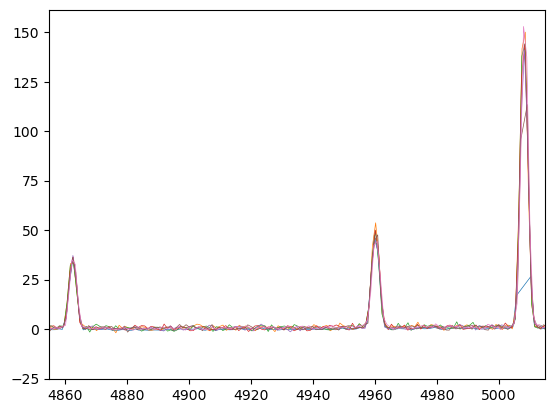

In [37]:
fig,ax = plt.subplots()
ax.plot(wavelength, flux, lw=0.5)
ax.set_xlim((4855,5015))

nexp = header['NEXP']
for sub_exp in range(nexp//2):
    sub_data = spec_hdu[4+sub_exp].data
    sub_flux = sub_data['flux']
    sub_wavelength = 10**sub_data['loglam'] / (1+z)
    ax.plot(sub_wavelength, sub_flux, lw=0.5)

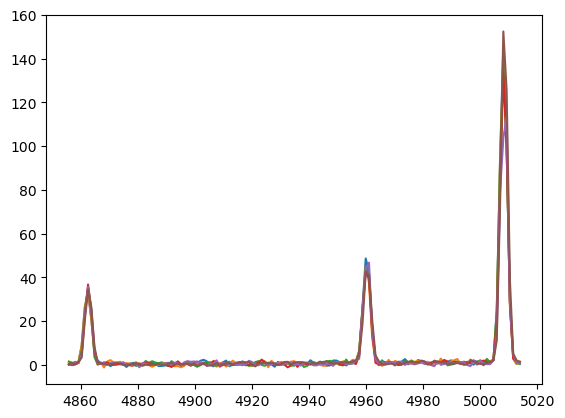

In [39]:
uerg = u.erg/(u.s*u.cm**2*u.AA)

oii_wave = 10**loglam[min1:max1] / (1+z)*u.AA
interpolate_data = []
for sub_exp in range(nexp//2):
    sub_data = spec_hdu[4+sub_exp].data
    sub_flux = sub_data['flux']
    sub_wavelength = 10**sub_data['loglam'] / (1+z)
    input_spectra = Spectrum1D(flux=sub_flux*uerg,spectral_axis=sub_wavelength*u.AA)
    ax.plot(sub_wavelength, sub_flux, lw=0.5)
    fluxc_resample = LinearInterpolatedResampler()
    spectra = fluxc_resample.resample1d(input_spectra, oii_wave)
    plt.plot(oii_wave, spectra.flux)
    interpolate_data.append(spectra.flux)

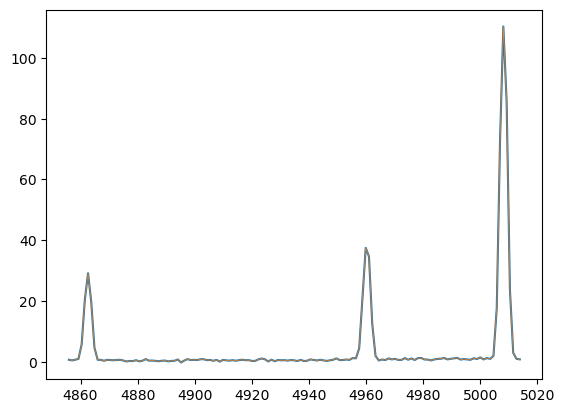

In [59]:
corrected_flux = []
for i in range(len(oii_wave)):
    sum = 0
    j = 0
    for j in range(len(interpolate_data)-1):
        sum += interpolate_data[j][i]
        j += 1
    corrected_flux.append(sum/len(interpolate_data))
    i += 1


plt.plot(oii_wave,corrected_flux*uerg)
plt.plot(oii_wave, flux[min1:max1], linewidth=0.5)

flux[min1:max1] = corrected_flux

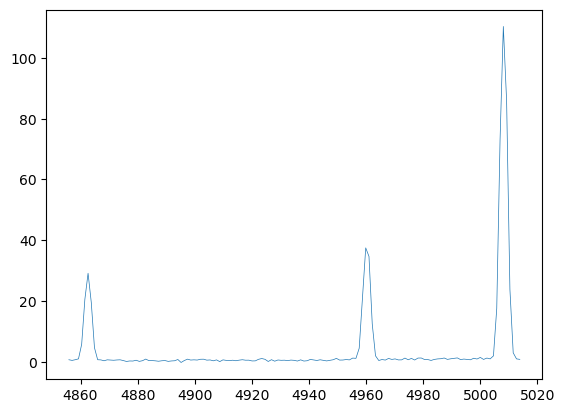

In [63]:
plt.plot(wavelength[min1:max1], flux[min1:max1], linewidth=0.5)

[15.66465    0.8180117 -3.476121  ...  6.7076855  7.1068993 -5.6313677] [5514.8193 5516.1    5517.3784 ... 9768.738  9770.091  9771.442 ]
[  5.830407   -3.736041   -4.796036  ...  -2.5562255  -2.870093
 -32.12345  ] [5514.7773 5516.0576 5517.3354 ... 9774.104  9775.456  9776.809 ]
[ 6.0778604 -5.3583097 -8.250668  ...  4.2253833 46.02203   27.990173 ] [5514.6406 5515.9214 5517.1997 ... 9779.385  9780.727  9782.081 ]
[ 0.49405542 -9.432217   -5.1162567  ... 26.410007   40.237217
 20.986042  ] [5514.405 5515.685 5516.963 ... 9779.117 9780.47  9781.822]
[-12.891468   -3.9104285  -1.4949187 ...  -0.7536902 -16.52274
  -5.814988 ] [5514.129  5515.4097 5516.691  ... 9773.4375 9774.791  9776.143 ]
[ 1.9392896 -2.8229024 -6.2854233 ...  6.528896  42.047077  14.844933 ] [5513.878  5515.158  5516.4365 ... 9779.921  9781.275  9782.628 ]


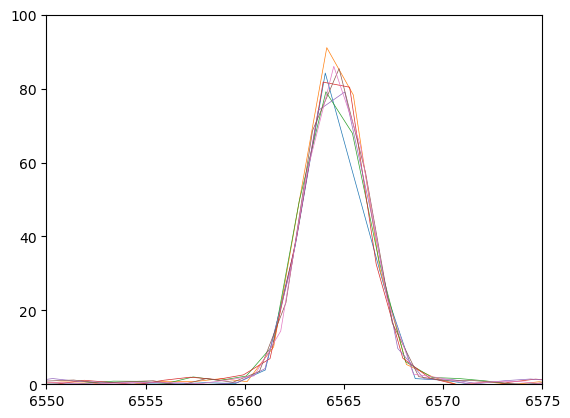

In [65]:
fig,ax = plt.subplots()
ax.plot(wavelength, flux, lw=0.5)
ax.set_xlim(6550,6575)
ax.set_ylim((0,100))

for sub_exp in range(nexp//2):
    sub_data = spec_hdu[4+nexp//2+sub_exp].data
    sub_flux = sub_data['flux']
    sub_wavelength = 10**sub_data['loglam'] / (1+z)
    print(sub_flux, sub_wavelength)
    ax.plot(sub_wavelength, sub_flux, lw=0.5)

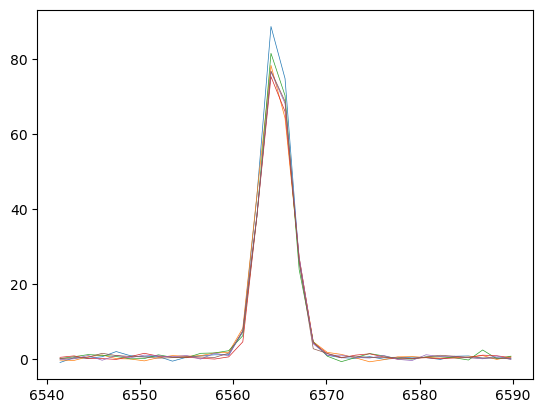

In [67]:
uerg = u.erg/(u.s*u.cm**2*u.AA)

h_alpha_wave = 10**loglam[min2:max2] / (1+z)*u.AA

interpolate_data = []
for sub_exp in range(nexp//2):
    sub_data = spec_hdu[4+nexp//2+sub_exp].data
    sub_flux = sub_data['flux']
    sub_wavelength = 10**sub_data['loglam'] / (1+z)
    input_spectra = Spectrum1D(flux=sub_flux*uerg,spectral_axis=sub_wavelength*u.AA)
    ax.plot(sub_wavelength, sub_flux, lw=0.5)
    fluxc_resample = LinearInterpolatedResampler()
    spectra = fluxc_resample.resample1d(input_spectra, h_alpha_wave)
    plt.plot(h_alpha_wave, spectra.flux,lw=0.5)
    interpolate_data.append(spectra.flux)

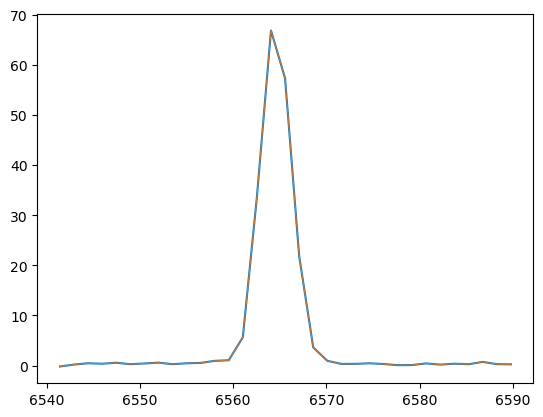

In [79]:
corrected_flux = []
for i in range(len(h_alpha_wave)):
    sum = 0
    j = 0
    for j in range(len(interpolate_data)-1):
        sum += interpolate_data[j][i]
        j += 1
    corrected_flux.append(sum/len(interpolate_data))
    i += 1


plt.plot(h_alpha_wave,corrected_flux*uerg)
plt.plot(h_alpha_wave, flux[min2:max2], linewidth=0.5)

flux[min2:max2] = corrected_flux

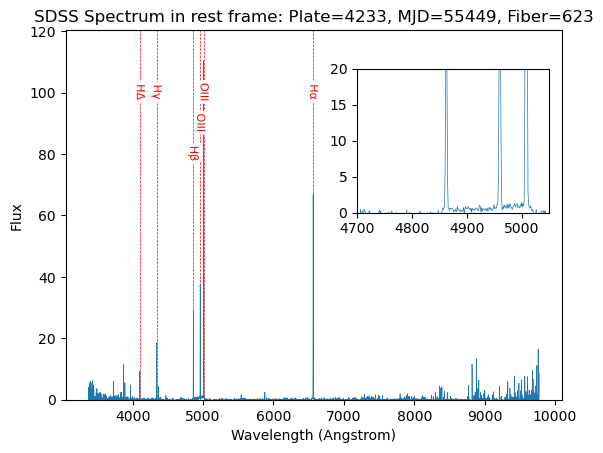

In [105]:
fig, ax = plt.subplots()

#common spectral lines in SDSS
xvals = [6564.61, 5008.240, 4960.295, 4862.68, 4102.89, 4341.68 ]
label = ['Hα', 'OIII', 'OIII', 'Hβ', 'HΔ', 'Hγ']

for i in range(len(xvals)):
     plt.axvline(xvals[i], color="red", linewidth=0.5, linestyle="--", label= label[i])

#plot the spectrum
ax.plot(wavelength, flux, linewidth=0.5)
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.ylim(0,max(flux/uerg)+10)
plt.title(f"SDSS Spectrum in rest frame: Plate={plate}, MJD={mjd}, Fiber={fiber}")

#vertical lines
offset = [40, 40, 30, 20, 40, 40]
lines = plt.gca().get_lines()
labelLines(lines, align=True, yoffsets=offset, xvals = xvals, fontsize = 8)

#inset plot
inset = fig.add_axes([0.58, 0.5, 0.3, 0.3])
inset.plot(wavelength, flux, linewidth=0.5)
inset.set_xlim(4700, 5050)
inset.set_ylim(0, 20)
plt.savefig("spec-4233-55449-0623_FIXED.png")

plt.show()

In [127]:
c = 3*10**5 #km/s
inf = math.inf

def h_alpha(x, amp, sig, v):
    x_0 = 6564.61 * (1+(v/c))
    wid= sig*x_0/c
    return (amp * np.exp(-(x - x_0)**2 / (2 * wid**2)))

def n_ii_1(x, amp, sig, v):
    x_0 = 6549.86 * (1+(v/c))
    wid= sig*x_0/c
    return (amp * np.exp(-(x - x_0)**2 / (2 * wid**2)))

def n_ii_2(x, amp, sig, v):
    x_0 = 6585.27 * (1+(v/c))
    wid= sig*x_0/c
    return (3*amp * np.exp(-(x - x_0)**2 / (2 * wid**2)))

def broad(x, amp, sig, v):
    x_0 = 6564.61 * (1+(v/c))
    wid= sig*x_0/c
    return (amp * np.exp(-(x - x_0)**2 / (2 * (wid)**2)))

def Gauss(x,amp1, amp2, amp3, sig1, sig2, v_n, v_b):
    return h_alpha(x, amp1, sig1, v_n) + n_ii_1(x, amp2, sig1, v_n) + n_ii_2(x, amp2, sig1, v_n) + broad(x, amp3, sig2, v_b)

In [131]:
parameters, covariance = curve_fit(Gauss, wavelength, flux,sigma = uncert,  method = "trf", p0=[150,20,2, 50, 1000, 50, 50], 
                                           bounds=([0,0,0,50,500, 0, 0],[inf, inf,5,500, 5000, inf, inf]))
print(parameters)
A, B, C, D, E, F, G = parameters
fit = Gauss(wavelength/(1+z), A, B, C, D, E, F, G)
ymax = np.max(fit)

fig, ax = plt.subplots()
plt.plot(wavelength, flux, linewidth=2)
plt.plot(wavelength, fit, '--', color = 'orange',linewidth=5, label=f"\n \n \n \n \n \n amp1={round(A,3)}, \namp2={round(B,3)}, \namp3={round(C,3)}, \nsig1={round(D,3)},\nsig2={round(E,3)}, \nv_in1={F:.3e}, \nv_in2={G:.3e}")
plt.plot(wavelength, h_alpha(wavelength, A, D, F), '--',color = 'green',linewidth=2)
plt.plot(wavelength, n_ii_1(wavelength, B, D, F), '--',color = 'purple',linewidth=2)
plt.plot(wavelength, n_ii_2(wavelength, B, D, F), '--',color = 'purple',linewidth=2)
plt.plot(wavelength, broad(wavelength, C, E, G), '--',color = 'black',linewidth=2)
plt.xlim(6540, 6595)
plt.ylim(0,ymax+10)
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.title(f"SDSS Spectrum in rest frame: Plate={plate}, MJD={mjd}, Fiber={fiber}") 
plt.legend(loc='center right')

#inset plot
inset = inset_axes(ax, width='40%', height='30%', loc='upper right',)
inset.plot(wavelength/(1+z), flux, linewidth=2, label='Data')
inset.plot(wavelength/(1+z), fit, '--', color = 'orange',linewidth=5)
inset.plot(wavelength/(1+z), h_alpha(wavelength/(1+z), A, D, F), '--',color = 'green',linewidth=2)
inset.plot(wavelength/(1+z), n_ii_1(wavelength/(1+z), B, D, F), '--',color = 'purple',linewidth=2)
inset.plot(wavelength/(1+z), n_ii_2(wavelength/(1+z), B, D, F), '--',color = 'purple',linewidth=2)
inset.plot(wavelength/(1+z), broad(wavelength/(1+z), C, E, G), '--',color = 'black',linewidth=2)
inset.set_xlim(6540, 6595)
inset.set_ylim(-ymax/20, ymax/20)
mark_inset(ax, inset, loc1=3, loc2=4, fc='yellow', ec='g', ls='--')

plt.savefig(str(plate) + "-" + str(mjd)+ "-"+ str(fiber)+"_Gaussian.jpeg")
plt.show()

err = flux-fit*uerg
infty = []
color = []
uncert = [(1/np.sqrt(item)) if (item != 0) else 0 for item in spec_data['ivar']]
color = ['blue' if (item != 0) else 'red' for item in spec_data['ivar']]
plt.errorbar(wavelength/(1+z), err, yerr = uncert, fmt='o',markersize=4, zorder=2.5, capsize=5, markeredgecolor="green", label='Data')
plt.scatter(wavelength/(1+z), uncert, color = color, linewidth=2, s = 3, label='Data')
plt.axhline(y = 0)
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux - Fitted Flux")
plt.title(f"SDSS Spectrum Fit Error: Plate={plate}, MJD={mjd}, Fiber={fiber}")
plt.xlim(6540, 6595)
plt.ylim(-2, 2)
plt.savefig(str(plate) + "-" + str(mjd)+ "-"+ str(fiber)+"_Gaussian_err.jpeg")

ValueError: Residuals are not finite in the initial point.

In [ ]:
col1 = fits.Column(name='flux', format='D', array=flux)
col2 = fits.Column(name='wavelength', format='D', array=wavelength)
table_data = fits.BinTableHDU.from_columns([col1, col2])

new_primary_hdu = fits.PrimaryHDU()
new_hdul = fits.HDUList([new_primary_hdu, table_data])

new_hdul.writeto('spec-4233-55449-0623_FIXED.fits', overwrite=True)